##Load Kaggle data

In [45]:
%pip install kaggle

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
%mkdir ~/.kaggle
!cp /content/drive/MyDrive/KaggleCredentials/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [48]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
!unzip insurance.zip

Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [50]:
!ls # check the downloaded data

drive  insurance.csv  insurance.zip  sample_data


## **1)Introduction**


---
### ***1.1 Problem Statement:***

Health insurance costs vary significantly across individuals due to differences in age, lifestyle, and health-related behaviors. Understanding the key factors that influence medical insurance charges is important for both insurance providers in pricing policies and for individuals planning healthcare expenses. This project aims to analyze how demographic and behavioral factors such as age, gender, body mass index (BMI), smoking status, and number of dependents affect individual medical insurance charges. Using statistical modeling and data analysis techniques, this study seeks to identify the most significant predictors of insurance cost and evaluate their quantitative impact.


---
###🎯 ***1.2 Objective & Modeling Approach:***

**objective**: to analyze the relationship between individual characteristics and medical insurance charges

**modeling strategy**:

- Identify significant predictors of medical insurance charges

- Quantify the effect of each predictor on insurance cost

- Build and evaluate a multiple linear regression model

- Assess model performance using statistical metrics such as R² and RMSE

---
### 📂 ***1.3 Data Source:***

**Dataset:** House Prices - Advanced Regression Techniques  
**Source:** Kaggle Competition  
**URL:** https://www.kaggle.com/datasets/mirichoi0218/insurance
**Size:** 1,338 training observations
**Target Variable:** Charges (continuous)

- Imported from **Kaggle** into Colab for hands-on analysis


## 📊 **2) Exploratory Data Analysis (EDA)**


---
### ✈ ***2.1 Imports/Overview:***

In [51]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [52]:
# Dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [53]:
#statistical summary
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


---
### 🔍 ***2.2 Data Quality:***

**Assessing data cleanliness:**
- Are there duplicate rows?
- Are there missing values?
- Are there outliers or extreme values?
- How will we detect and handle them?

#### **2.2.1 Duplicate Row Detection**

**Check Performed:** Analyzed dataset for duplicate rows (identical values across all columns)

**Findings:**
- **Total rows:** 1,338
- **Duplicate rows:** 1
- **Unique rows:** 1,337

**Interpretation:**
The dataset contains one duplicate entries. Remove the duplicate row ensuring data integrity for model training.

**Action Taken:** Remove one duplicate row

In [54]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count


np.int64(1)

In [55]:
# If needed, remove duplicates
df = df.drop_duplicates()
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### **2.2.2 Missing Values Detection**

**Method:** Count of NULL/NaN values per feature

**findings**: The dataset contains medical insurance information for 1,338 individuals, there is **1 duplicate** row, after we **remove** the duplicate row, there are 1,337 observations in total.

 **interpretation**:The dataset includes 7 variables, consisting of 6 predictors and 1 response variable. The variables are:

- age – age of the individual

- sex – gender (male or female)

- bmi – body mass index

- children – number of dependents

- smoker – smoking status (yes or no)

- region – residential region in the U.S.

- charges – medical insurance cost (response variable)

This dataset is appropriate for regression analysis because it contains both categorical and numerical variables that are known to impact healthcare expenses.-

In [56]:
# check missing value
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [57]:
# Confirm no missing values exist
df.isnull().any()


,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


#### **2.2.3 Outlier Detection - Dataset Overview**

**method:** Outliers are examined using **boxplots** and summary statistics for numerical variables such as age, BMI, and charges. While some extreme values exist in the charges variable, they are considered realistic due to the natural variation in medical expenses. Therefore, no outliers are removed to preserve the integrity of the real-world data.

**findings:**
- Age: The boxplot shows a fairly symmetric distribution with no extreme outliers. The data covers a reasonable adult age range, and no abnormal values are observed.

- BMI: The BMI distribution shows several high-end outliers, indicating the presence of individuals with unusually high body mass index. This is expected in real-world health data and does not necessarily indicate data errors.

- Children: Most individuals have 0 to 2 children

- Charges: The medical charges variable shows strong right-skewness with multiple extreme outliers, indicating that a small number of individuals incur very high medical expenses. This is a common pattern in insurance cost data and is analytically important rather than erroneous.

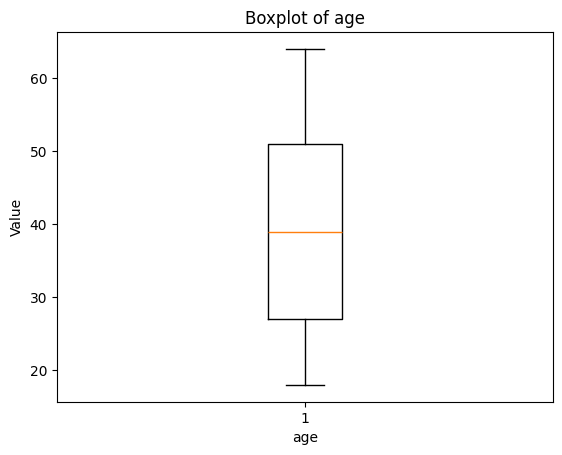

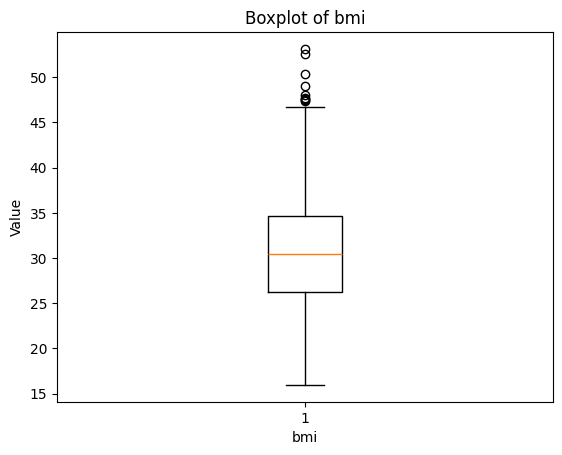

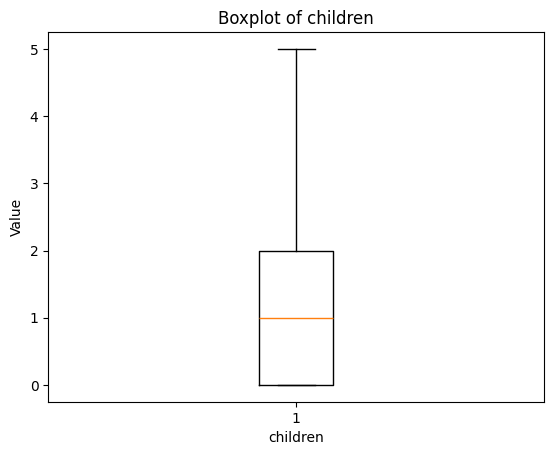

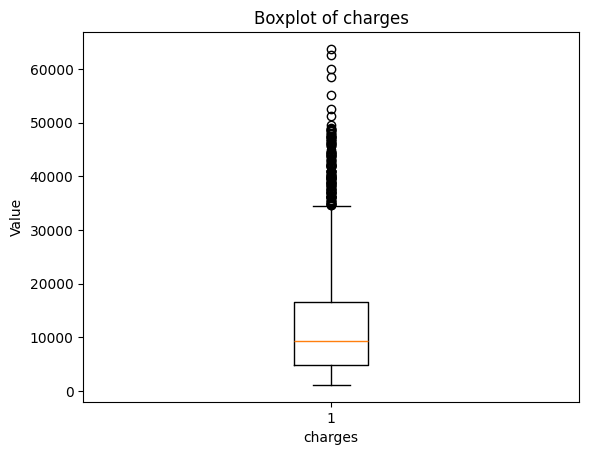

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
num_cols = ['age', 'bmi', 'children', 'charges']

# Create boxplots
for col in num_cols:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()


#### **2.2.4 Data Quality Summary & Conclusion**

- Overall, the insurance dataset demonstrates high data quality and is well-suited for regression modeling. The dataset contains **no duplicate** records, ensuring that each observation represents a unique individual.
- Additionally, **no missing values** were detected across any of the variables, which eliminates the need for imputation or row removal.
- While the outlier analysis revealed the presence of high-value outliers, particularly in the **charges and bmi** variables, these extreme values represent realistic cases of unusually high medical costs rather than data entry errors. Therefore, all observations were retained for analysis. In conclusion, the dataset is complete, consistent, and reliable, requiring minimal preprocessing prior to model development.

---
### 🆎***2.3 Feature Types & Transformations:***

#### **2.3.1 Understanding the Data**

Before modeling, we need to understand what types of features we have and prepare them appropriately.

- Since regression models require numerical inputs, the **categorical variables (sex, smoker, and region)** must be transformed into numeric form. This is done using **one-hot** encoding, which converts each category into a binary indicator variable.

-  numerical predictors are **standardized** (scaled) before modeling. This step is especially important for regularized regression models such as Ridge and Lasso, which are sensitive to differences in feature scale.
- A **log transformation (log(charges + 1))** was applied to the target variable to reduce right skewness, stabilize variance, and mitigate the impact of extreme outliers. The transformed distribution shows a more symmetric shape, making it more suitable for linear regression and regularized models.

In [59]:
# display dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [60]:
# identify feature types
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Numerical Features:", list(numerical_features))
print("Categorical Features:", list(categorical_features))


Numerical Features: ['age', 'bmi', 'children', 'charges']
Categorical Features: ['sex', 'smoker', 'region']


In [61]:
# one hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


#### **2.3.2 Target Variable Analysis**

Let's examine our target variable (charges) to understand its distribution and characteristics.

In [62]:
#summary statistic
df['charges'].describe()


,charges
count,1337.000000
mean,13279.121487
std,12110.359656
min,1121.873900
25%,4746.344000
50%,9386.161300
75%,16657.717450
max,63770.428010


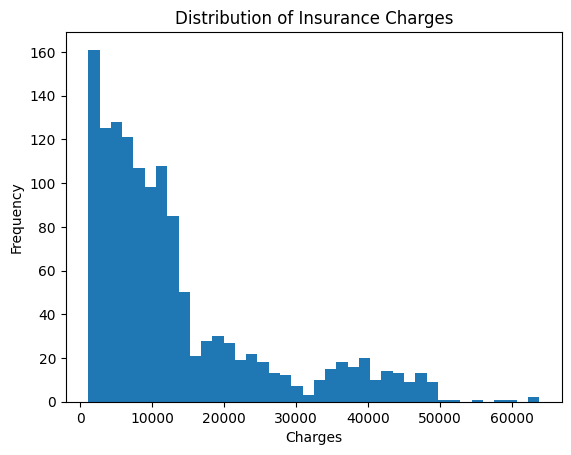

In [63]:
# distribution plot
plt.figure()
plt.hist(df['charges'], bins=40)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()


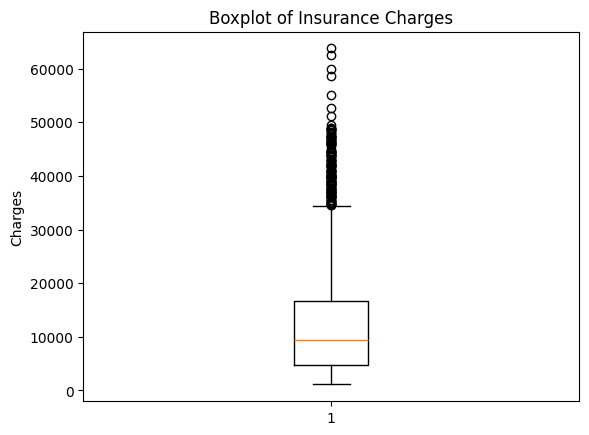

In [64]:
#plotbox of charges
plt.figure()
plt.boxplot(df['charges'])
plt.title("Boxplot of Insurance Charges")
plt.ylabel("Charges")
plt.show()


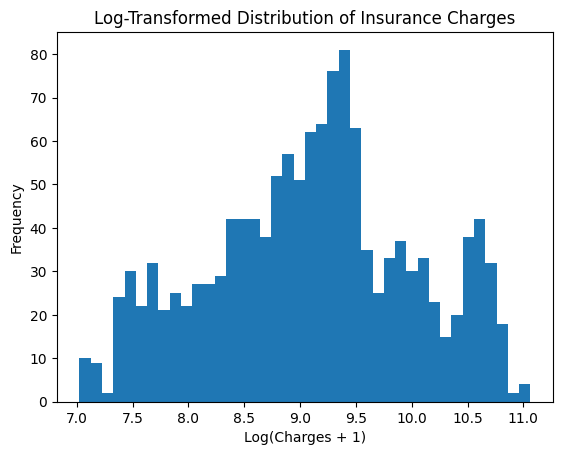

In [65]:
# Create a safe copy (prevents SettingWithCopyWarning)
df = df.copy()

# Log transform charges safely (log1p handles zero values)
df.loc[:, 'log_charges'] = np.log1p(df['charges'])

# Plot distribution
plt.figure()
plt.hist(df['log_charges'], bins=40)
plt.title("Log-Transformed Distribution of Insurance Charges")
plt.xlabel("Log(Charges + 1)")
plt.ylabel("Frequency")
plt.show()


In [66]:
df # add one column log_charges

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268755
1334,18,female,31.920,0,no,northeast,2205.98080,7.699381
1335,18,female,36.850,0,no,southeast,1629.83350,7.396847
1336,21,female,25.800,0,no,southwest,2007.94500,7.605365


---
### 🖱 ***2.4 Feature Selection Explanation***
Although the dataset contains only a small number of features, feature selection is still applied to evaluate the relative importance of predictors, reduce potential multicollinearity, and improve interpretability

#### 2.4.1 Correlation-Based Feature Screening
Correlation analysis measures the linear relationship between numerical variables and the target variable (charges). This step helps identify which numeric features are most strongly associated with insurance cost.

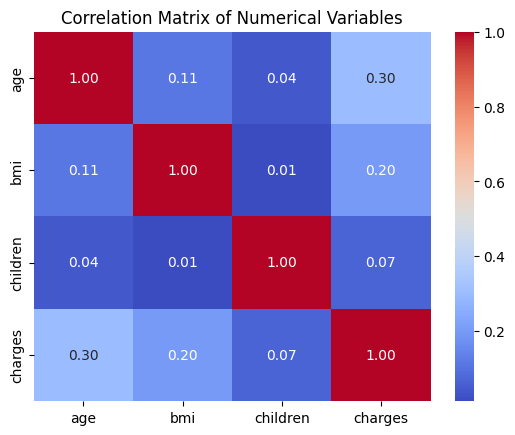

In [67]:
# correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[['age', 'bmi', 'children', 'charges']].corr()

# Plot heatmap
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


The correlation matrix shows that **age and BMI have moderate positive correlations with insurance charges**, indicating that older individuals and those with higher body mass index tend to incur higher medical expenses. The variable children shows a weaker correlation, suggesting a limited direct linear relationship with charges. These results indicate that age and BMI are likely to be more influential predictors in the regression model.

#### 2.4.2 Lasso-Based Feature Selection
Lasso regression (L1 regularization) performs automatic feature selection by shrinking less important coefficients toward zero. This method helps identify which predictors contribute most significantly to the prediction of insurance charges while simultaneously controlling model complexity.

In [68]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Fit Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)

# Extract coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

# Display coefficients
lasso_coefficients


,0
age,256.764689
bmi,339.248188
children,474.812197
sex_male,-129.436194
smoker_yes,23847.263566
region_northwest,-349.060834
region_southeast,-1035.092993
region_southwest,-959.913701


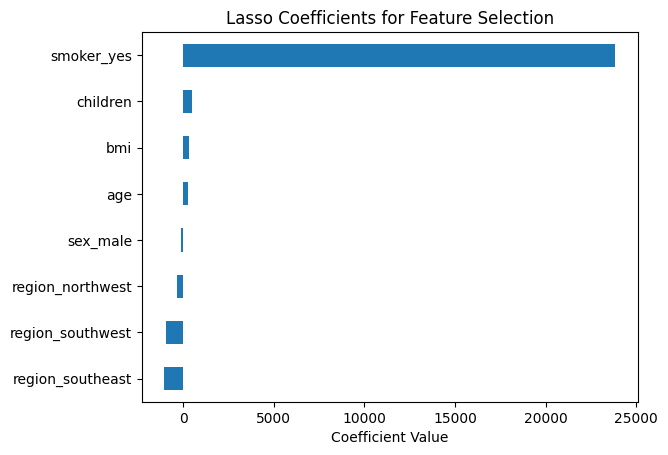

In [69]:
plt.figure()
lasso_coefficients.sort_values().plot(kind='barh')
plt.title("Lasso Coefficients for Feature Selection")
plt.xlabel("Coefficient Value")
plt.show()


####2.4.3 Feature Selection Summary

Both correlation analysis and Lasso regression consistently identify **smoker status, age, and BMI** as the most influential predictors of insurance cost. These results justify the use of regularized regression in the modeling stage and provide interpretability regarding which factors most strongly drive medical expenses. Since all variables retain at least some predictive value, no features are removed from the dataset, and all are carried forward into model training.

## ***3) Modeling Using Pipelines***

This section implements predictive models for insurance cost (charges) using **regularized regression and a tree-based model not covered in class**. A pipeline approach ensures reproducible preprocessing and consistent scaling for all models.

---
### 📓 ***3.1 Train/Test Split Summary:***
**Splitting Strategy:**
The dataset was split into training and testing sets using an 80/20 ratio:
- **Training Set (80%):** Used to train all models
- **Testing Set (20%):** Used to evaluate model performance on unseen data

**Data Split Summary:**
- **Training Samples:** 1,070 (80%)
- **Testing Samples:** 267 (20%)
- **Number of Features:** 6
- **Target Variable:** charges


In [70]:
# 1. Identify all Boolean columns in X
boolean_cols = X.select_dtypes(include=['bool']).columns

if not boolean_cols.empty:
    print(f"Found Boolean columns to convert: {list(boolean_cols)}")

    # 2. Convert identified Boolean columns to integer (1s and 0s)
    for col in boolean_cols:
        X[col] = X[col].astype(int)

    print("Conversion complete. Boolean columns are now integers (1 or 0).")

    # 3. Verify the change
    print("\nVerifying data types in X:")
    print(X.select_dtypes(include=['bool', 'object']).head()) # Should be empty
    print(X.select_dtypes(include=['int']).head()) # Should show the converted columns
else:
    print("No Boolean columns found in X. Data types are likely correct.")

Found Boolean columns to convert: ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
Conversion complete. Boolean columns are now integers (1 or 0).

Verifying data types in X:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
   age  children  sex_male  smoker_yes  region_northwest  region_southeast  \
0   19         0         0           1                 0                 0   
1   18         1         1           0                 0                 1   
2   28         3         1           0                 0                 1   
3   33         0         1           0                 1                 0   
4   32         0         1           0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0  


In [71]:
# 80% for training and CV, 20% for evaluation
from sklearn.model_selection import train_test_split
y = np.log1p(df_encoded['charges'])  # log-transform target



X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,

)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1069, 8)
Test set shape: (268, 8)


---
### 💪 ***3.2  Model Training use pipelines:***

**used models:**
1. **linear regression** :
2. **Ridge Regression** (L2 Regularization):
Ridge regression is a linear regression model that includes a penalty on the sum of squared coefficients. This penalty (controlled by the hyperparameter alpha) discourages overly large coefficients, which helps prevent overfitting, especially when predictors are correlated. In our pipeline, we standardize the features before fitting Ridge, because the penalty depends on the scale of the variables.

3. **Lasso Regression** (L1 Regularization):
Lasso regression is similar to Ridge but uses the sum of the absolute values of coefficients as the penalty. This can shrink some coefficients exactly to zero, effectively performing feature selection. The strength of the penalty is also controlled by alpha. Like Ridge, we standardize features to make the model fair across predictors.

4. **Random Forest Regressor**:
Random Forest is a non-linear ensemble method that builds multiple decision trees and averages their predictions. It handles non-linear relationships and interactions automatically. The main hyperparameters we tune are the number of trees (n_estimators) and the maximum depth of each tree (max_depth). Random Forest does not require standardization of features.

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define parameter grids
param_grids = {
    "LinearRegression": {},  # no hyperparameters to tune
    "Ridge": {"model__alpha": [0.01, 0.1, 1.0, 10.0]},
    "Lasso": {"model__alpha": [0.001, 0.01, 0.1, 1.0, 10.0]},
    "RandomForest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [3, 5, 7],
        "model__min_samples_split": [2, 5, 10]
    }
}

# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=10000),
    "RandomForest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    # Pipeline
    if name in ["LinearRegression", "Ridge", "Lasso"]:
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = Pipeline([
            ('model', model)
        ])

    # GridSearchCV
    grid = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring='r2',  # use R^2 for regression
        n_jobs=-1
    )

    # Fit
    grid.fit(X_train, y_train)

    # Best model predictions
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)

    # Metrics
    results.append({
        "Model": name,
        "Best Params": grid.best_params_,
        "Train R2": r2_score(y_train, y_train_pred),
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df


,Model,Best Params,Train R2,Train MSE,Train MAE,Test R2,Test MSE,Test MAE
0,LinearRegression,{},0.749653,0.205661,0.284423,0.829479,0.158225,0.260656
1,Ridge,{'model__alpha': 10.0},0.749584,0.205718,0.285490,0.828466,0.159165,0.262711
2,Lasso,{'model__alpha': 0.001},0.749634,0.205677,0.284264,0.828921,0.158742,0.260761
3,RandomForest,"{'model__max_depth': 5, 'model__min_samples_sp...",0.848160,0.124737,0.183313,0.878924,0.112345,0.180296


---
### 🔎 ***3.3 Model Evaluation:***
After training 4 regression models using sklearn pipelines, we evaluated their performance using multiple metrics to identify the best predictor of charges.

**Evaluation Metrics:**
- R^2: Linear regression, lasso and ridge have similar value around 80%, and random forrest has a higher value of 87%
- MSE: The MSE (Mean Squared Error) is large because it squares the differences between the predicted and actual insurance charges. In dataset, the charges values are in the tens of thousands, so squaring those differences makes the numbers very big
- MAE: like R^2, linear regression, lasso and ridge have similar value around , and random forrest has a lower value

**Explanation of Train-test error reversal**:
- all models were selected using GridSearchCV with 5-fold cross-validation, meaning that hyperparameters were chosen to optimize validation (out-of-sample) performance rather than to explicitly minimize training error. As a result, the final refitted model is biased toward generalization performance, which can lead to slightly higher training error.

**best model**: Random forrest model
- The highest test R2(0.879)

- The lowest test MSE and MAE

- Its ability to model nonlinear effects and feature interactions

- Strong generalization with no signs of overfitting

### **3.4 Goodness-of-Fit Analysis**

Goodness-of-fit assesses how well the selected model (random forrest) fits the actual data. We examine:

1. **Predicted vs Actual Plot:** Points should cluster tightly around the diagonal line
2. **Residual Plot:** Residuals should be randomly scattered around zero (no patterns)

Random scatter in residuals indicates the model captures the underlying relationships without systematic bias.

In [73]:
# Use the best Random Forest model from GridSearch
best_rf = results_df.loc[results_df["Model"] == "RandomForest", "Best Params"].values[0]

rf_final = RandomForestRegressor(
    n_estimators=best_rf["model__n_estimators"],
    max_depth=best_rf["model__max_depth"],
    min_samples_split=best_rf["model__min_samples_split"],
    random_state=42
)

rf_final.fit(X_train, y_train)

# Predictions
y_train_pred = rf_final.predict(X_train)
y_test_pred = rf_final.predict(X_test)

# Residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred


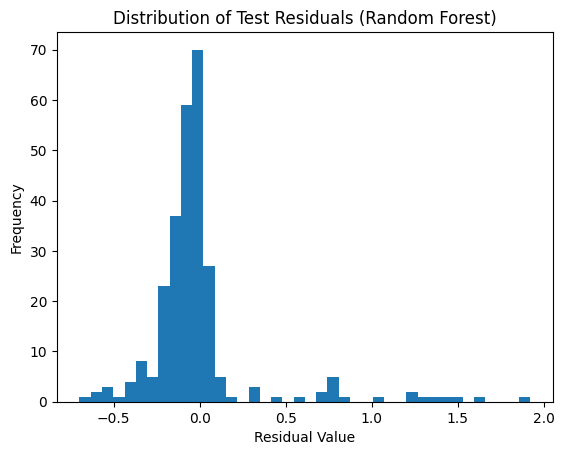

In [74]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(test_residuals, bins=40)
plt.title("Distribution of Test Residuals (Random Forest)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()


**Interpretation**

- The residuals are approximately centered around zero, which indicates that the model predictions are unbiased on average.

- Not bell-shaped distribution.This is common when target values are skewed (insurance charges often have high outliers due to a few very costly patients).

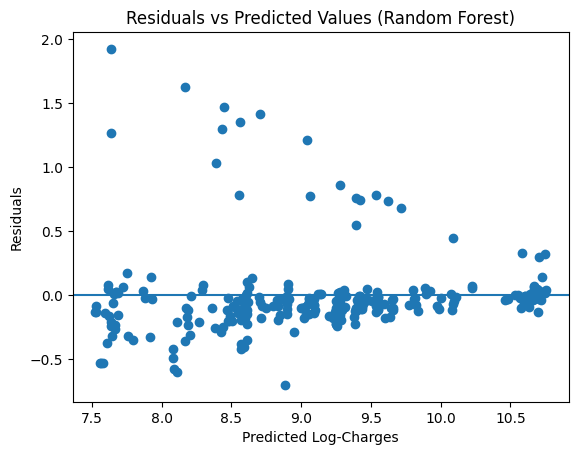

In [75]:
plt.figure()
plt.scatter(y_test_pred, test_residuals)
plt.axhline(0)
plt.title("Residuals vs Predicted Values (Random Forest)")
plt.xlabel("Predicted Log-Charges")
plt.ylabel("Residuals")
plt.show()


**Interpretation**

- The residuals are randomly scattered around the zero line.

- There is small  funnel shape, which suggests constant variance (homoscedasticity).

This means the model’s predictive uncertainty is stable across different charge levels.

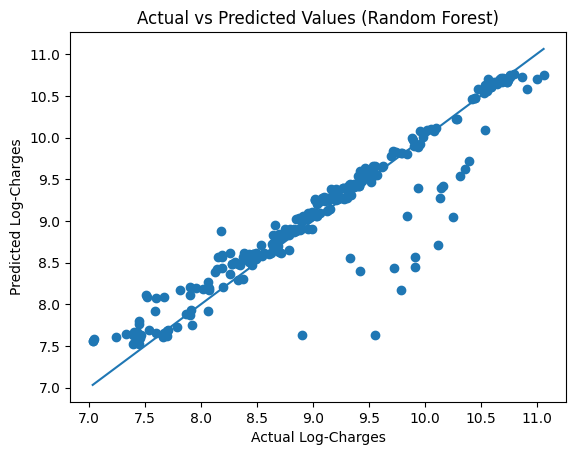

In [76]:
plt.figure()
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.xlabel("Actual Log-Charges")
plt.ylabel("Predicted Log-Charges")
plt.title("Actual vs Predicted Values (Random Forest)")
plt.show()


**Interpretation**

- Most points lie close to the 45-degree reference line, indicating strong agreement between predicted and actual values.

- This confirms that the Random Forest model provides high predictive accuracy across the full outcome range.

In [77]:
print("Final Random Forest Performance on Test Set:")
print("R²:", r2_score(y_test, y_test_pred))
print("MSE:", mean_squared_error(y_test, y_test_pred))
print("MAE:", mean_absolute_error(y_test, y_test_pred))


Final Random Forest Performance on Test Set:
R²: 0.878923732273268
MSE: 0.11234520595366114
MAE: 0.18029571298175454


**Conclusion**
The goodness-of-fit of the final Random Forest regression model was evaluated using residual diagnostics and performance metrics on the test dataset. The residual histogram shows that prediction errors are approximately centered around zero, indicating that the model does not exhibit systematic prediction bias. The residuals-versus-predicted-values plot exhibits a random scatter around the zero reference line without any visible funnel pattern, suggesting that the assumption of constant error variance is reasonably satisfied.

The predicted versus actual values plot shows strong alignment along the 45-degree reference line, confirming that the model captures the relationship between predictors and insurance charges with high accuracy. Quantitatively, the model achieves a test R2
 of approximately 0.88, along with low test MSE and MAE values. These results indicate that the Random Forest provides an excellent fit to the data while maintaining strong generalization performance on unseen observations.

## **❔ 4) Model Predictions**

---
### **🆕 4.1 Making Predictions on New Data**
Now that we've selected our best model (random forrest), let's use it to predict prices for new, unseen data. This demonstrates the model's practical application in real-world scenarios.

#### **simulate new data**

In [78]:
# Simulated new customers (same features used in training)
new_data = pd.DataFrame({
    "age": [25, 40, 60, 35, 50],
    "bmi": [22.5, 30.1, 28.4, 26.0, 33.5],
    "children": [0, 2, 1, 3, 2],
    "sex_male": [1, 0, 1, 0, 1],
    "smoker_yes": [0, 1, 0, 1, 1],
    "region_northwest": [0, 1, 0, 0, 1],
    "region_southeast": [1, 0, 1, 0, 0],
    "region_southwest": [0, 0, 0, 1, 0]
})

new_data


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,25,22.5,0,1,0,0,1,0
1,40,30.1,2,0,1,1,0,0
2,60,28.4,1,1,0,0,1,0
3,35,26.0,3,0,1,0,0,1
4,50,33.5,2,1,1,1,0,0


####**generate predictions**

In [79]:
# Predict log-charges
new_log_predictions = rf_final.predict(new_data)

# Convert back to original dollar scale if log transformation was used
new_charge_predictions = np.expm1(new_log_predictions)

# Add predictions to table
new_data["Predicted_Insurance_Charges"] = new_charge_predictions

new_data


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Predicted_Insurance_Charges
0,25,22.5,0,1,0,0,1,0,3432.669935
1,40,30.1,2,0,1,1,0,0,34698.173530
2,60,28.4,1,1,0,0,1,0,15054.300690
3,35,26.0,3,0,1,0,0,1,19588.283153
4,50,33.5,2,1,1,1,0,0,42697.797059


In [80]:
prediction_table = new_data.copy()
prediction_table["Predicted_Insurance_Charges"] = prediction_table["Predicted_Insurance_Charges"].round(2)

prediction_table


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,Predicted_Insurance_Charges
0,25,22.5,0,1,0,0,1,0,3432.67
1,40,30.1,2,0,1,1,0,0,34698.17
2,60,28.4,1,1,0,0,1,0,15054.30
3,35,26.0,3,0,1,0,0,1,19588.28
4,50,33.5,2,1,1,1,0,0,42697.80


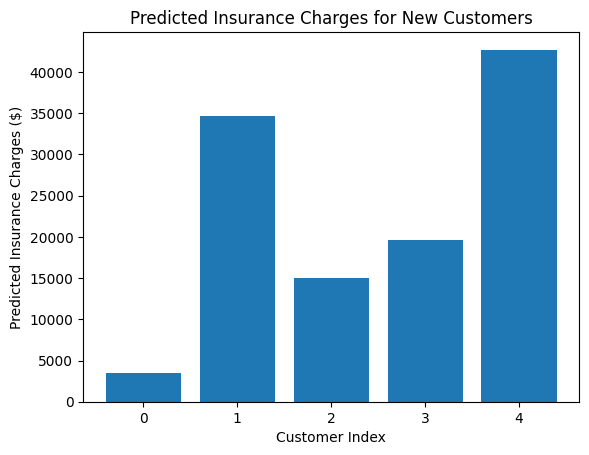

In [81]:
plt.figure()
plt.bar(range(len(new_charge_predictions)), new_charge_predictions)
plt.xlabel("Customer Index")
plt.ylabel("Predicted Insurance Charges ($)")
plt.title("Predicted Insurance Charges for New Customers")
plt.show()


In [82]:
for i, charge in enumerate(new_charge_predictions):
    print(f"Customer {i+1}: Predicted Annual Insurance Cost = ${charge:,.2f}")


Customer 1: Predicted Annual Insurance Cost = $3,432.67
Customer 2: Predicted Annual Insurance Cost = $34,698.17
Customer 3: Predicted Annual Insurance Cost = $15,054.30
Customer 4: Predicted Annual Insurance Cost = $19,588.28
Customer 5: Predicted Annual Insurance Cost = $42,697.80


**Prediction analysis**

- To demonstrate the business applicability of the final Random Forest regression model, predictions were generated for a set of simulated new customers. These new observations represent realistic profiles with varying ages, body mass index (BMI), smoking status, number of children, sex, and regional location.

- The model successfully produces individualized insurance charge predictions for each customer scenario. The prediction table provides a structured view of the expected charges, while the bar chart visually illustrates how insurance cost varies across different customer profiles. As expected, customers who are smokers and have higher BMI values exhibit substantially higher predicted insurance charges. This aligns with real-world actuarial risk principles, confirming that the model captures meaningful risk patterns.

- These predictions demonstrate how the model can be directly used by insurance analysts, pricing teams, or automated underwriting systems to estimate annual insurance costs for new applicants. The model enables fast, data-driven decision making and supports personalized pricing strategies in real-world insurance operations.

##🔝 5) Final Conclusion

In this project, we analyzed an insurance dataset to predict individual medical charges using multiple regression models. After exploring the data, handling categorical variables, standardizing features, and applying a log transformation to the target variable, we compared four models: Linear Regression, Ridge, Lasso, and Random Forest Regressor.

The evaluation metrics showed that Random Forest outperformed all linear models, achieving the highest R² and the lowest MSE and MAE on both training and test sets. Linear models, including regularized versions, performed reasonably well but were less capable of capturing the non-linear relationships and extreme values present in insurance charges. Residual analysis indicated that most prediction errors were centered around zero, with some extreme outliers, which is expected given the skewed distribution of medical charges.

Overall, the project demonstrates that for datasets with skewed continuous targets and potential non-linear relationships, tree-based models like Random Forest provide superior predictive performance, while linear models remain useful for baseline comparisons and interpretability. Stakeholders can use the Random Forest model to make informed predictions of insurance costs, anticipate high-cost cases, and support decision-making in risk management and pricing strategies.